# Tutorial 5
## NAME: Soham Sahasrabuddhe
## ROLL NUMBER: 23B1848

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Question 1

In [141]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
magic_gamma_telescope = fetch_ucirepo(id=159) 

# data (as pandas dataframes) 
X = pd.DataFrame(magic_gamma_telescope.data.features)
y = pd.DataFrame(magic_gamma_telescope.data.targets) 
  
# Features
print(X) 
  
# Targets
print(y) 


        fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  
0       -8.2027  40.0920   81.8828  
1       -9.9574   6.3609  205.2610  
2      -45.2

In [142]:
y = y.replace('g', 1).replace('h', 0)

In [143]:
# Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Part (a)

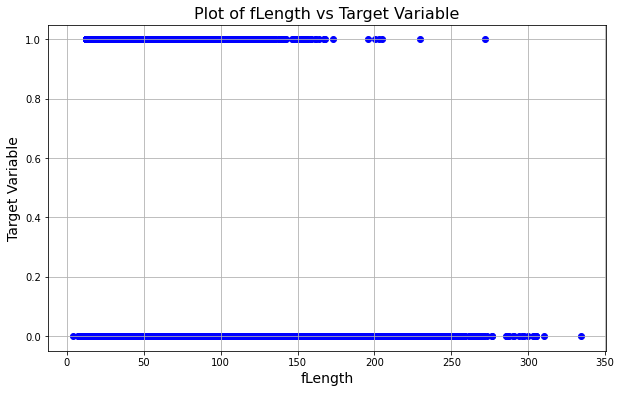

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Extract features and target variable
f_length = np.array(X['fLength'])
target = np.array(y['class'])

# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(f_length, target, marker='o', c='b')

# Add labels and title
plt.title('Plot of fLength vs Target Variable', fontsize=16)
plt.xlabel('fLength', fontsize=14)
plt.ylabel('Target Variable', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

In [145]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [146]:
y_t = np.array(y_train)
y_train = y_t.ravel()

y_s = np.array(y_test)
y_test = y_s.ravel()

Linear Logistic

In [147]:
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [148]:
y_pred = logit_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [149]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1179  822]
 [ 356 3349]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67      2001
           1       0.80      0.90      0.85      3705

    accuracy                           0.79      5706
   macro avg       0.79      0.75      0.76      5706
weighted avg       0.79      0.79      0.79      5706



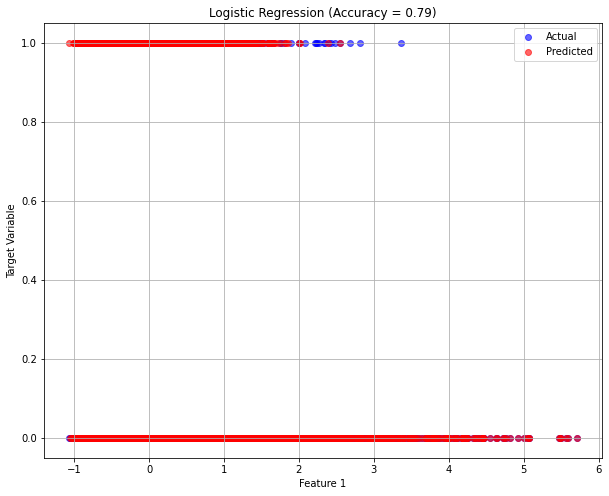

In [150]:
# Create a scatter plot
plt.figure(figsize=(10, 8))

# Plot actual vs predicted values
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted', alpha=0.6)

# Set title and labels
plt.title(f'Logistic Regression (Accuracy = {accuracy:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Target Variable')
# Add a legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

Ridge Logistic Regression

In [151]:
ridge_model = LogisticRegression(penalty='l2',C = 1)
ridge_model.fit(X_train, y_train)

LogisticRegression(C=1)

In [152]:
y_pred_ridge = ridge_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_ridge)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [153]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ridge))

Confusion Matrix:
 [[1179  822]
 [ 356 3349]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67      2001
           1       0.80      0.90      0.85      3705

    accuracy                           0.79      5706
   macro avg       0.79      0.75      0.76      5706
weighted avg       0.79      0.79      0.79      5706



Lasso Logistic Regression

In [154]:
lasso_model = LogisticRegression(penalty='l1', solver='saga', C = 1) # lbfgs only supports L2
lasso_model.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='saga')

In [155]:
y_pred_lasso = lasso_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lasso)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [156]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lasso))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lasso))

Confusion Matrix:
 [[1179  822]
 [ 356 3349]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.59      0.67      2001
           1       0.80      0.90      0.85      3705

    accuracy                           0.79      5706
   macro avg       0.79      0.75      0.76      5706
weighted avg       0.79      0.79      0.79      5706



### Part (b)

In [157]:
model = SVC(kernel='rbf',gamma=1, C = 1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [158]:
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

accuracy = 0.8662811076060287

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      2001
           1       0.87      0.94      0.90      3705

    accuracy                           0.87      5706
   macro avg       0.87      0.83      0.85      5706
weighted avg       0.87      0.87      0.86      5706



In [159]:
'''
# Applying GridSearchCV to find best kernel and corresponding constants
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

search = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy')
search.fit(X_train, y_train)
print("Best Parameters: ", search.best_params_)
print("Best Accuracy: ", search.best_score_)
'''

'\n# Applying GridSearchCV to find best kernel and corresponding constants\nparam_grid = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'rbf\', \'poly\'],\n    \'gamma\': [\'scale\', \'auto\', 0.01, 0.1, 1]\n}\n\nsearch = GridSearchCV(SVC(), param_grid, cv = 5, scoring=\'accuracy\')\nsearch.fit(X_train, y_train)\nprint("Best Parameters: ", search.best_params_)\nprint("Best Accuracy: ", search.best_score_)\n'

In [160]:
'''
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
'''

'\nbest_model = search.best_estimator_\ny_pred = best_model.predict(X_test)\nprint(f\'accuracy = {accuracy_score(y_test, y_pred)}\')\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n'

This was the analysis of Support Vector Machine Model

## Question 2

In [161]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features
y = iris.data.targets
target_names = iris.data.target_names
  
# Features 
print(X) 
  
# Targets
print(y)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
              class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

In [163]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
y_t = np.array(y_train)
y_train = y_t.ravel()

y_s = np.array(y_test)
y_test = y_s.ravel()

Linear Logistic

In [165]:
logit_model = LogisticRegression(penalty='none',max_iter=200, multi_class= 'multinomial')
logit_model.fit(X_train, y_train)

/home/soham10/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial', penalty='none')

In [166]:
y_pred = logit_model.predict(X_test)
a = accuracy_score(y_test, y_pred)
print("Accuracy:", a)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



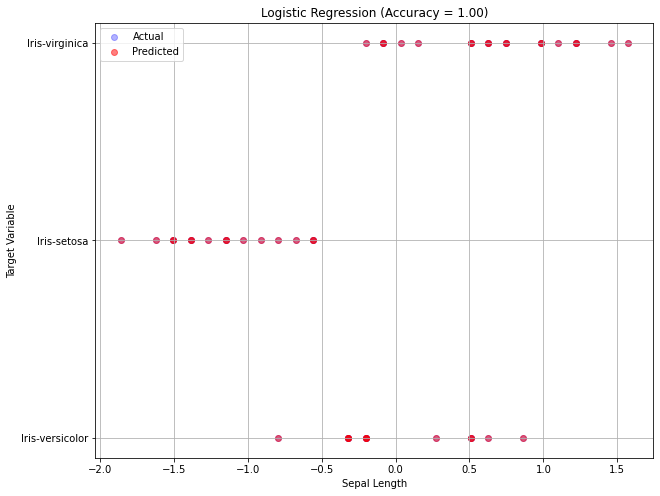

In [167]:
# Create a scatter plot
plt.figure(figsize=(10, 8))

# Plot actual vs predicted values
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual', alpha=0.3)
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted', alpha=0.5)

# Set title and labels
plt.title(f'Logistic Regression (Accuracy = {a:.2f})')
plt.xlabel('Sepal Length')
plt.ylabel('Target Variable')

# Add a legend
plt.legend()

# Show the plot
plt.grid()
plt.show()

Ridge Logistic Regression

In [168]:
ridge_model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, multi_class='multinomial')
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Model Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ridge))

Ridge Model Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Lasso Logistic Regression

In [169]:
lasso_model = LogisticRegression(penalty='l1', solver='saga', C=1.0, max_iter=1000, multi_class='multinomial')
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Model Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lasso))

Lasso Model Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Support Vector Machine Classification

In [170]:
svc = SVC(kernel='rbf', C = 1, decision_function_shape='ovr')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [171]:
print(f'accuracy = {accuracy_score(y_test, y_pred)}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

accuracy = 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Classification performed using Logistic(Linear, Ridge, Lasso) and SVCs for iris dataset as an example of multiclass problems.